<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/MachineLearningPrincipalComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

## Data Dimensionality Reduction 
### Principal Component Analysis for Data Visualization

#### The IRIS Dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
%matplotlib inline

#Import the Iris Dataset

In [0]:
from sklearn.datasets import load_iris

iris_data_sk = load_iris()

iris_data_pd = pd.DataFrame(iris_data_sk.data, columns = iris_data_sk.feature_names)
iris_data_pd['target'] = pd.Series(iris_data_sk.target)

#dataset feature names
features = iris_data_pd.columns[0:4]
#target value dictionaries
#dictionary containing index values to target names
dictionary = {
    0: str(iris_data_sk.target_names[0]),
    1: str(iris_data_sk.target_names[1]),
    2: str(iris_data_sk.target_names[2])
}
#dictionary containing  target names to index value

my_inverted_dict = dict(map(reversed, dictionary.items()))

iris_data_pd = iris_data_pd.replace({'target': dictionary})
##Another way of replacing values using the map function
#iris_data_pd["target"] = iris_data_pd["target"].map(my_inverted_dict)




In [103]:
iris_data_pd.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
x = iris_data_pd.loc[:,features].values
y = iris_data_pd.loc[:, ['target']].values


In [0]:
x = StandardScaler().fit_transform(x)

In [114]:
pd.DataFrame(data = x, columns = features ).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# Principal Component Analysis

## Projection to two dimensions

In [0]:
n_components = 2
pca= PCA(n_components)

In [0]:
principalComponents = pca.fit_transform(x)

In [146]:
principalDF = pd.DataFrame(data = principalComponents,
                           columns = ['PCA1','PCA2'])

principalDF

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [147]:
iris_data_pd['target']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [148]:
principalDFcomp = pd.concat([principalDF, iris_data_pd[['target']]],axis = 1)
principalDFcomp

,PCA1,PCA2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


# Two-Dimensional Visualization

we use a two dimensional projection to visualize all our data. Note how we have reduced the dimensionality of the data from four to two.

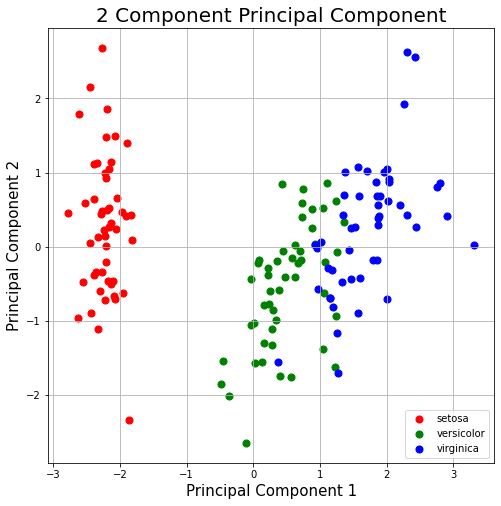

In [149]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1",fontsize = 15)
ax.set_ylabel("Principal Component 2",fontsize = 15)
ax.set_title("2 Component Principal Component",fontsize = 20)
targets = iris_data_pd["target"].unique()

colors = ['r','g','b']

for target, color in zip(targets, colors):
  indicesToKeep = principalDFcomp['target'] == target
  ax.scatter(principalDFcomp.loc[indicesToKeep, "PCA1"],
             principalDFcomp.loc[indicesToKeep, "PCA2"],
             c = color,
             s = 50)
ax.legend(targets)
ax.grid()
